# <center>The Output Files</center>

<center>Dr. W.J.B. Mattingly</center>

<center>Smithsonian Data Science Lab and United States Holocaust Memorial Museum</center>

<center>March 2022</center>

## Covered in this Chapter

1) The .tokens file<br>
2) The .entities file<br>
3) The .quote file<br>
4) The .supersense file<br>
5) The .book file<br>
6) The .book.html file<br>

## Introduction

In the last chapter, we looked at how to create a BookNLP pipeline and process a book or longer document. The goal of that process was to generate a collection of files within an output directory. In our case, we stored our files in "data/harry_potter". Within this repo, you will be able to examine the output files, but rather than making you switch between this textbook and the repo, I thought I would present the files in this chapter as data.

The output from the BookNLP pipeline is three types of files: TSV files (.tokens, .entities, .quotes, .supersense), a JSON file (.book) and an HTML file (.book.html). A good way to think about a TSV is as a CSV where tabs are used to separate tabular data, rather than commas. Essentially, this is a dataset that can be viewed and analyzed in Excel. A JSON file is a bit different. It stores data as you would expect to see it in Python, e.g. dictionaries, lists, etc.

The goal of this chapter is to explain what each of these files contains so that in the next few chapters, we can start extracting important data from them.

## The .tokens File

The very first file that we should analyze is the .tokens file. Essentially, this is a tab separated value file (TSV) that contains all the tokens on each line of the file and some important data about those tokens. A token is a word or punctuation mark within a text. The very first line of the file will look something like this:

paragraph_ID	sentence_ID	token_ID_within_sentence	token_ID_within_document	word	lemma	byte_onset	byte_offset	POS_tag	fine_POS_tag	dependency_relation	syntactic_head_ID	event

As this can be a bit difficult to parse, I am going to load it up as a TSV file through Pandas so we can analyze it a bit better.

In [24]:
import pandas as pd

df = pd.read_csv("data/harry_potter/harry_potter.tokens", delimiter="\t")
df

,paragraph_ID,sentence_ID,token_ID_within_sentence,token_ID_within_document,word,lemma,byte_onset,byte_offset,POS_tag,fine_POS_tag,dependency_relation,syntactic_head_ID,event
0,0,0,0,0,Mr.,Mr.,0,3,PROPN,NNP,nsubj,12,O
1,0,0,1,1,and,and,4,7,CCONJ,CC,cc,0,O
2,0,0,2,2,Mrs.,Mrs.,8,12,PROPN,NNP,compound,3,O
3,0,0,3,3,Dursley,Dursley,13,20,PROPN,NNP,conj,0,O
4,0,0,4,4,",",",",20,21,PUNCT,",",punct,0,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99251,2995,6885,10,99251,Dudley,Dudley,438929,438935,PROPN,NNP,pobj,99250,O
99252,2995,6885,11,99252,this,this,438936,438940,DET,DT,det,99253,O
99253,2995,6885,12,99253,summer,summer,438941,438947,NOUN,NN,npadvmod,99245,O
99254,2995,6885,13,99254,....,....,438947,438951,PUNCT,.,punct,99243,O


If you don't know what the block of code above does, please do not be concerned. We will not be dealing with Pandas in this textbook. If you are interested in Pandas, though, I have a free textbook on it entitled <a href="pandas.pythonhumanities.com">Introduction to Pandas</a>.

As you can see from the output above, we have something that looks like Excel, or tabular data. Let's break this down a bit and explain what each column represents:

- paragraph_ID - the index of the paragraph, starting at paragraph 1 being 0 and moving up to 3031 in our case.
- sentence_ID - same as the paragraph_ID, but with sentences
- token_ID_within_sentence - same as a the two above, but with a token count by sentence, resetting with each sentence.
- token_ID_within_document - same as above, but where tokens keep going up in value throughout the whole document, starting at 0 and ending, in our case, at 99400.
- word - this is the raw text of the word
- lemma - this is the root of the word
- byte_onset - think of this as the start character index
- byte_offset - think of this as the concluding character index
- POS_tag = the Part of Speech (based on spaCy)
- fine_POS_tag - a more granular understanding of the Part of Speech
- dependency_relation - this is equivalent to spaCy's dep tag.
- syntactic_head_ID - This points to the head of the current token so that you can understand how a token relates to other words in the sentence
- event = this tells you if the token is a trigger for an EVENT or not. You will see, 0, EVENT, or NaN here.

## The .entities File

Let's do the same thing with the .entities file now!

In [26]:
df_entities = pd.read_csv("data/harry_potter/harry_potter.entities", delimiter="\t")
df_entities

,COREF,start_token,end_token,prop,cat,text
0,364,0,0,PROP,PER,Mr.
1,92,2,3,PROP,PER,Mrs. Dursley
2,1,9,10,PROP,FAC,Privet Drive
3,365,17,17,PRON,PER,they
4,366,23,23,PRON,PER,you
...,...,...,...,...,...,...
15858,2355,99227,99227,PRON,PER,They
15859,2351,99231,99231,PRON,PER,we
15860,441,99239,99239,NOM,FAC,home
15861,98,99241,99241,PRON,PER,I


If you get an error that looks like this:
```{image} ./images/booknlp_error.PNG
:alt: jupyter_org
:class: bg-primary
:width: 500px
:align: center
```

Fear not! This happens sometimes when the .entities file is corrupted with something like a " mark. You simply need to go into the file and remove the character that is causing the error. Use the row number as an indicator of where to go in the text file. Remember, add one row because row 1 is the header data.

Before:
```{image} ./images/booknlp_solution.PNG
:alt: jupyter_org
:class: bg-primary
:width: 500px
:align: center
```
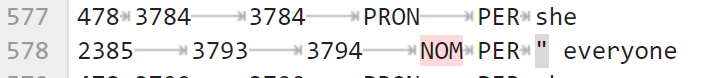

After:
```{image} ./images/booknlp_solution2.PNG
:alt: jupyter_org
:class: bg-primary
:width: 500px
:align: center
```
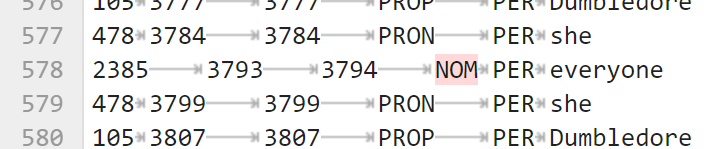

Let's return to our data.

In [27]:
df_entities

,COREF,start_token,end_token,prop,cat,text
0,364,0,0,PROP,PER,Mr.
1,92,2,3,PROP,PER,Mrs. Dursley
2,1,9,10,PROP,FAC,Privet Drive
3,365,17,17,PRON,PER,they
4,366,23,23,PRON,PER,you
...,...,...,...,...,...,...
15858,2355,99227,99227,PRON,PER,They
15859,2351,99231,99231,PRON,PER,we
15860,441,99239,99239,NOM,FAC,home
15861,98,99241,99241,PRON,PER,I


Here we see all the entities found within the text. In our case, wee have 15,863 entities in the entire book. It is important to remember that some of these are, of course. Before we get to that, though, let's break down the columns.

- COREF - This is a COREF id that is a unique identifier for the person. This number will be used elsewhere to reference a person, such as in the .quotes file, to link the speaker with the block of text. It should be noted, that COREF is one of the more challenging problems in NLP. Expect this to not be even close to 90% accurate, rather around the 70% accuracy range, particularly when pronouns are used for the entity.
- start_token - this is the start token of the entity name
- end_token - this is the end token of the entity name. Single token entities will have the same start and end, while multi-word tokens (MWTs) will increase by one for each additional token
- prop - this will tlel you if it is a PROP (proper noun) or PROPN (pronoun), or other categories
- cat - cat will be the entity type (in spaCy terms. BookNLP includes a few other useful categories, notable VEH for vehicle.
- text - this is the raw text that corresponds to the entity.

## The .quotes File

The .quotes file will contain all the quotes in the book. Let's take a look at this data like we did above.

In [31]:
df_quotes = pd.read_csv("data/harry_potter/harry_potter.quotes", delimiter="\t")
df_quotes

,quote_start,quote_end,mention_start,mention_end,mention_phrase,char_id,quote
0,434,438,443,443,he,93,"Little tyke ,"
1,1089,1108,1085,1085,they,417,"The Potters , that 's right , that 's what I ..."
2,1343,1346,1347,1347,he,93,"Sorry ,"
3,1416,1460,1405,1405,he,435,"Do n't be sorry , my dear sir , for nothing c..."
4,1603,1606,1608,1609,Mr. Dursley,93,Shoo !
...,...,...,...,...,...,...,...
2322,99133,99146,99147,99147,He,119,"Hurry up , boy , we have n't got all day ."
2323,99163,99172,99161,99161,Hermione,220,"See you over the summer , then ."
2324,99173,99184,99186,99186,Hermione,220,"Hope you have -- er -- a good holiday ,"
2325,99202,99208,99210,99210,Harry,98,"Oh , I will ,"


In our case, we have 2,326 quotes in the entire book. Each quote contains some important metadata:

- quote_start - the start token of the quote
- quote_end - the end token of the quote
- mention_start - this is the start token of the speaker entity
- mention_end - this is the end token of the speaker entity
- char_id - this will be the unique identifier we saw above in the .entities file so that you can perform COREF and find all dialogues for a single character. Remember, there WILL LIKELY BE ERRORS here. Sometimes you may need to manually align two entity ids as a single character (as we will see)
- quote - this is the raw text of the quote.

## The .supersense file

The final TSV file that we have is the .supersense file. This is something that I think is quite unique to BookNLP and an absolute delight to have.  Here we have all supersense text found. A good way to think about supersense is as a more broadly defined entities file. Here, we not only have entities, like people, places, etc, but also things like "perception".

In [30]:
df_supersense = pd.read_csv("data/harry_potter/harry_potter.supersense", delimiter="\t")
df_supersense

,start_token,end_token,supersense_category,text
0,0,0,noun.person,Mr.
1,2,3,noun.person,Mrs. Dursley
2,6,6,noun.quantity,number
3,7,7,noun.quantity,four
4,9,10,noun.location,Privet Drive
...,...,...,...,...
29313,99239,99239,noun.location,home
29314,99245,99245,verb.perception,have
29315,99249,99249,noun.act,fun
29316,99251,99251,noun.person,Dudley


We can see that we have 29,318 different supersense items with four pieces of data:

- start_token - this is the start token for the supersense text
- end_token - this is the end token for the supersense text
- supersense_category - this is the part of speech and category to which the supersense belongs
- text - this is the raw text of the supersense

## The .book File

Now that we have looked at all the TSV files, let's take a look at the .book file. This is a large JSON file that contains information structured around the characters. In the next few chapters, we will learn a lot more about this file, but for now, let's explore how it is structured.

In [32]:
import json

with open ("data/harry_potter/harry_potter.book", "r") as f:
    book_data = json.load(f)
book_data.keys()

dict_keys(['characters'])

It is a giant dictionary with one key: characters. The value of characters is a list. Let's check out it's length.

In [33]:
len(book_data["characters"])

723

So, we have 723 unique characters throughout the book. Again, expect errors here. For each character, we have a dictionary with 8 keys:;

In [17]:
book_data["characters"][0].keys()

dict_keys(['agent', 'patient', 'mod', 'poss', 'id', 'g', 'count', 'mentions'])

These keys are as follows:

- agent - actions that character does
- patient - actions done to that character
- mod - adjectives that describe them in the text
- poss - things the entity has (very broadly defined), e.g. relatives like aunt, uncle; or parts of the body, e.g. head, back, etc. 
- id - their unique id (as seen above)
- g - analysis about gender pronouns used
- count - number of times the entity appears
- mentions - how the character is referenced

In [47]:
book_data["characters"][0]["agent"][:1]
book_data["characters"][0]["patient"][:1]
book_data["characters"][0]["mod"][:1]
book_data["characters"][0]["poss"][:1]
book_data["characters"][0]["id"]
book_data["characters"][0]["g"]
book_data["characters"][0]["count"]
book_data["characters"][0]["mentions"].keys()

dict_keys(['proper', 'common', 'pronoun'])

In [49]:
book_data["characters"][0]["mod"][:10]

[{'w': 'name', 'i': 1206},
 {'w': 'older', 'i': 4370},
 {'w': 'famous', 'i': 4423},
 {'w': 'ready', 'i': 4533},
 {'w': 'special', 'i': 5645},
 {'w': 'famous', 'i': 5651},
 {'w': 'asleep', 'i': 5935},
 {'w': 'fast', 'i': 6318},
 {'w': 'small', 'i': 6338},
 {'w': 'skinny', 'i': 6340}]

In [50]:
book_data["characters"][0]["poss"][:10]

[{'w': 'aunt', 'i': 4356},
 {'w': 'uncle', 'i': 4358},
 {'w': 'name', 'i': 4461},
 {'w': 'blankets', 'i': 5622},
 {'w': 'cousin', 'i': 5698},
 {'w': 'Petunia', 'i': 5947},
 {'w': 'aunt', 'i': 5981},
 {'w': 'back', 'i': 6020},
 {'w': 'aunt', 'i': 6062},
 {'w': 'aunt', 'i': 6133}]

In [51]:
book_data["characters"][0]["id"]

98

For the g category, we see a few different keys:

- inference - the pronouns for the entity in order of highest frequency to lowest
- argmax - the likely pronoun/gender for the entity
- max - the degree to which that pronoun set is used compared to others, e.g. the percentage
- total (not entirely sure about this)

In [52]:
book_data["characters"][0]["g"]

{'inference': {'he/him/his': 0.811,
  'she/her': 0.112,
  'they/them/their': 0.077,
  'xe/xem/xyr/xir': 0.0,
  'ze/zem/zir/hir': 0.0},
 'argmax': 'he/him/his',
 'max': 0.811,
 'total': 200311.834}

In [53]:
book_data["characters"][0]["count"]

2005

For mentions, we have three special keys:

- proper - the way they are referenced as proper nouns
- common - informal names
- pronoun - the pronouns used to refer to them in prose and dialogue

In [54]:
book_data["characters"][0]["mentions"].keys()

dict_keys(['proper', 'common', 'pronoun'])

In [55]:
book_data["characters"][0]["mentions"]["proper"]

[{'c': 664, 'n': 'Harry'},
 {'c': 46, 'n': 'Potter'},
 {'c': 23, 'n': 'Harry Potter'},
 {'c': 11, 'n': 'Mr. Potter'},
 {'c': 2, 'n': 'Mr. Harry Potter'},
 {'c': 1, 'n': 'Harry Hunting'},
 {'c': 1, 'n': 'Cokeworth Harry'},
 {'c': 1, 'n': 'Both Harry'},
 {'c': 1, 'n': 'The Harry Potter'},
 {'c': 1, 'n': 'HARRY POTTER'},
 {'c': 1, 'n': 'Even Harry'},
 {'c': 1, 'n': 'POTTER'},
 {'c': 1, 'n': 'the famous Harry Potter'}]

In [56]:
book_data["characters"][0]["mentions"]["common"]

[]

In [57]:
book_data["characters"][0]["mentions"]["pronoun"]

[{'c': 303, 'n': 'he'},
 {'c': 217, 'n': 'his'},
 {'c': 172, 'n': 'you'},
 {'c': 144, 'n': 'He'},
 {'c': 107, 'n': 'him'},
 {'c': 99, 'n': 'I'},
 {'c': 34, 'n': 'me'},
 {'c': 30, 'n': 'your'},
 {'c': 27, 'n': 'yeh'},
 {'c': 27, 'n': 'You'},
 {'c': 18, 'n': 'yer'},
 {'c': 16, 'n': 'himself'},
 {'c': 14, 'n': 'my'},
 {'c': 12, 'n': 'His'},
 {'c': 5, 'n': 'Your'},
 {'c': 3, 'n': 'Yeh'},
 {'c': 3, 'n': 'Yer'},
 {'c': 3, 'n': 'My'},
 {'c': 2, 'n': "yeh've"},
 {'c': 2, 'n': "yeh'd"},
 {'c': 2, 'n': 'ter'},
 {'c': 2, 'n': 'myself'},
 {'c': 2, 'n': 'yourself'},
 {'c': 1, 'n': 'YOU'},
 {'c': 1, 'n': 'mine'},
 {'c': 1, 'n': 'yours'},
 {'c': 1, 'n': "Yeh'd"},
 {'c': 1, 'n': 'yerself'},
 {'c': 1, 'n': "Yeh've"},
 {'c': 1, 'n': "yeh'll"}]

## The .book.html File

The final file that is outputted from BookNLP is the .book.html file. This is a nicely organized, easy-to-read, html file that should open in your browser. For this file, I am going to be covering it exclusively in the attached video as there is too much to realistically display in this notebook. If you find the video inaccessible, please let me know and I will add some text here with screenshots as a future update.

## Conclusion

It is my goal that this chapter has helped you understand the large quantity of data and files outputted by the BookNLP pipeline. Getting this data and understanding it is only half the battle. In the coming chapters, we will use what we learned here to gain some valuable insight about the new data that we have generated.